### Convergence tests on toy pseudopotential

#### 1. Plot the toy Hamiltonian eigenspectrum.

In [1]:
import itertools
import numpy as np
import itertools
from BZI.symmetry import make_ptvecs, shells
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import erfc

In [2]:
def toyPP(kpt):
    """Evaluate the roots of a toy hamiltonian at a given k-point.
    """
    kpt = np.array(kpt)
    n = 5
    Toy_H = np.zeros((n,n))
    pos = [[0,0],[1,0],[0,1],[-1,0],[0,-1]]
    for i in range(n):
        if i == 0:
            Toy_H[i,i] = 8*np.linalg.norm(kpt - pos[i])**2
        else:
            Toy_H[i,i] = np.linalg.norm(kpt - pos[i])**2
    return np.sort(np.linalg.eigvals(Toy_H))

In [3]:
def make_grid(n):
    """Create a grid that uniformly samples from -1/2 to 1/2 in the
    x- and y-directions
    """
    dx = 1/(n)
    xs = [-1./2 + 1./2*dx + i*dx for i in range(n)]
    grid = [[x,y] for x,y in itertools.product(xs,repeat=2)]
    return grid

Let's plot the grids to make sure they're correct.

In [4]:
def plot_grid(n):
    """Create a scatter plot of the grid points.
    """
    grid = make_grid(n)
    npts = len(grid)
    kxlist = [grid[i][0] for i in range(npts)]
    kylist = [grid[i][1] for i in range(npts)]

    ax = plt.subplot(1,1,1)# ,projection="2d")
    ax.scatter(kxlist, kylist, c="black",s=0.5)
    
    c1 = np.array([-1./2, -1./2])
    c2 = np.array([-1./2, 1./2])
    c3 = np.array([1./2, -1./2])
    c4 = np.array([1./2, 1./2])
    
    l1 = zip(c1, c2)
    l2 = zip(c1, c3)
    l3 = zip(c4, c2)
    l4 = zip(c4, c3)

    ls = [l1, l2, l3, l4]

    for l in ls:
        ax.plot(*l, c="blue")
    plt.show()
    return None

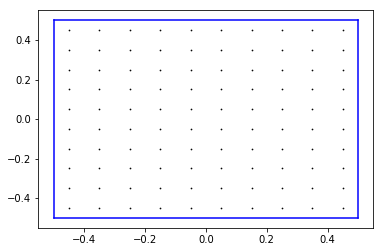

In [5]:
plot_grid(10)

In [7]:
def plot_toybands(n,all=False):
    """Plot the eigenspectrum of the toy Hamiltionian with n 
    sampling points in the x- and y-directions.
    """
    
    grid = make_grid(n)
    xs = [grid[i][0] for i in range(n*n)]
    ys = [grid[i][1] for i in range(n*n)]
    energies = []
    for i,g in enumerate(grid):
        energies.append(toyPP(g))
        
    if all == True:        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    for m in range(len(energies[0])):
        if all == False:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
        zs = [energies[l][m] for l in range(n*n)]
        ax.scatter(xs, ys, zs,s=0.005)
        if all == False:
            plt.show()
            plt.close
        else:
            continue
    if all == True:
        plt.show()

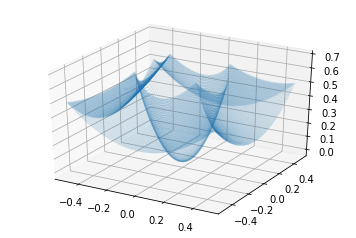

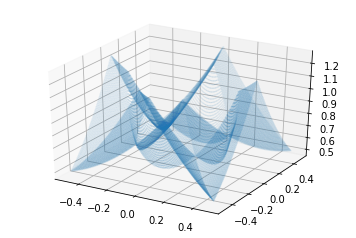

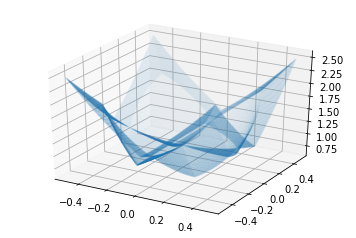

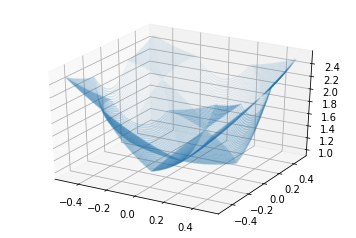

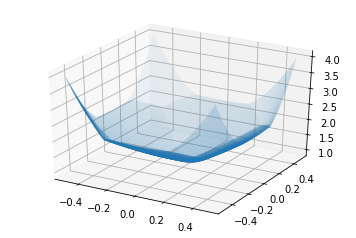

In [8]:
plot_toybands(200,False)

#### 1. Plot the convergence of the cutoff.

In [9]:
def toycutoff(n,C):
    """Find the energy at which the toy band structure it cut.
    
    Args:
        n (int): the number of grid points in the x- and y-directions.
        C (float): the area that determines the cutoff.
    Return:
        (float) the cutoff value
    """
    
    grid = make_grid(n)
    C = int(C*len(grid))
    energies = np.array([])
    for i,g in enumerate(grid):
        energies = np.concatenate((energies,toyPP(g)))
    return np.sort(energies)[C-1] # C -1 since python is zero based

In [15]:
C = 2.5
cutoff_answer = toycutoff(2**9,C)

In [16]:
cutoff_answer

1.1158313751220705

In [11]:
old_cutoff_answer = 1.1158313751220705

1.1158313751220705

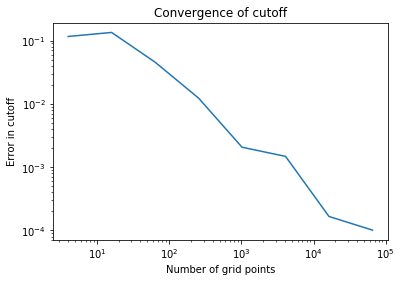

In [17]:
# This is the answer obtained for a 512*512 grid. It took a while to run so I'm including it here.
C = 2.5
# cutoff_answer = 0.85080909729003906
ns = [2**i for i in range(1,9)]
toy_cutoffs = []
for n in ns:
    toy_cutoffs.append(toycutoff(n,C))
errors = [abs(tc - cutoff_answer) for tc in toy_cutoffs]
total_pts = [n**2 for n in ns]

plt.loglog(total_pts, errors)
plt.title("Convergence of cutoff")
plt.xlabel("Number of grid points")
plt.ylabel("Error in cutoff")
plt.show()

#### 3. Integrate another toy function with an analytic solution

In [159]:
def rectangular_method(PP,n,cutoff):
    """Integrate the eigenspectrum beneath the cutoff.
    
    Args:
        PP (function): a function that returns an eigenspectrum.
        n (int): the number of points along the x- and y-directions.
        cutoff (float): the cutoff value.
        
    Return:
        (float): the volume of the eigenspectrum beneath the cutoff.
    """
    
    integral = 0
    grid = make_grid(n)
    for kpt in grid:
        integral += sum(filter(lambda x: x <= cutoff, PP(kpt)))
    return integral/len(grid)

Let's make sure the integration is being performed correctly by integrating something we know the solution to.

In [15]:
def W1(spt):
    """W1 is another toy model that we often work with. It is also convenient
    for unit testing since integrating it can be performed analytically.
    
    Args:
        spt (list or numpy.ndarray): a sampling point
    """
    return [np.product(np.exp([np.cos(2*np.pi*pt) for pt in spt]))]

In [16]:
# Calculated in Mathematica
W1_answer = 1.6029228068079633154

In [17]:
rectangular_method(W1,100,100)

1.6029228068079715

#### 4. Plot the volume convergence with an adjustable cutoff.

In [18]:
toy_volume_answer = toy_rectangular_method(toyPP,512,cutoff_answer) # 2**8 = 512
volume_answer = np.sum(toy_volume_answer)

In [19]:
toy_volume_answer

array([ 0.40328879,  0.72487855,  0.40203125,  0.09652751,  0.0135052 ])

In [20]:
volume_answer

1.6402312939171679

In [21]:
C = 2.5
toy_volumes = []
toy_cutoffs = []
ns = [2**i for i in range(1,9)]
for n in ns:
    cutoff = toycutoff(n,C)
    toy_cutoffs.append(cutoff)
    toy_volumes.append(rectangular_method(toyPP,n,cutoff))

cutoff_errors = [abs(tc - cutoff_answer) for tc in toy_cutoffs]    
volume_errors = [abs(tv - volume_answer) for tv in toy_volumes]
total_pts = [n**2 for n in ns]

plt.loglog(total_pts, volume_errors, label="volume")
plt.loglog(total_pts, cutoff_errors, label="cutoff")
plt.legend()
plt.title("Convergence of cutoff and volume")
plt.xlabel("Number of grid points")
plt.ylabel("Error")
plt.savefig("toy_convergence.pdf")

#### 5. Plot the cut eigenspectrum.

In [22]:
def cut_toyPP(kpt,cutoff):
    """Evaluate the roots of a toy hamiltonian at a given k-point.
    """
    kpt = np.array(kpt)
    n = 5
    Toy_H = np.zeros((n,n))
    # Toy_H[0,1:n] = 0.2
    # Toy_H[1:n,0] = 0.2
    pos = [[0,0],[1,0],[0,1],[-1,0],[0,-1]]
    for i in range(n):
        if i == 0:
            Toy_H[i,i] = 8*np.linalg.norm(kpt - pos[i])**2
        else:
            Toy_H[i,i] = np.linalg.norm(kpt - pos[i])**2
    eigs = np.sort(np.linalg.eigvals(Toy_H))    
    eigs[eigs > cutoff] = 0.
    return eigs

In [23]:
def plot_cut_toybands(n,cutoff,all=False):
    """Plot the eigenspectrum of the toy Hamiltionian with n 
    sampling points in the x- and y-directions.
    """
    
    grid = make_grid(n)
    xs = [grid[i][0] for i in range(n*n)]
    ys = [grid[i][1] for i in range(n*n)]
    energies = []
    for i,g in enumerate(grid):
        energies.append(cut_toyPP(g,cutoff))
        
    if all == True:        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    for m in range(len(energies[0])):
        if all == False:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
        zs = [energies[l][m] for l in range(n*n)]
        ax.scatter(xs, ys, zs,s=0.005)
        if all == False:
            plt.savefig("band%s.pdf"%m)
            plt.show()
            plt.close
        else:
            continue
    if all == True:
        plt.show()

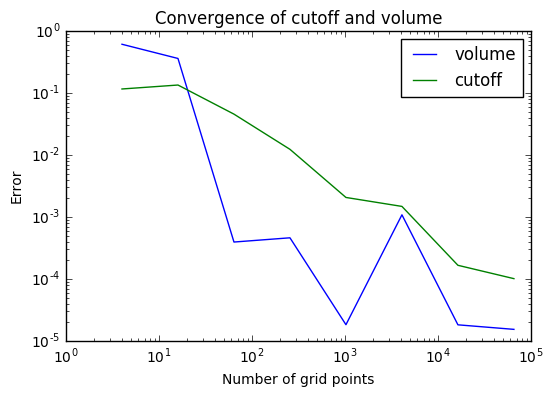

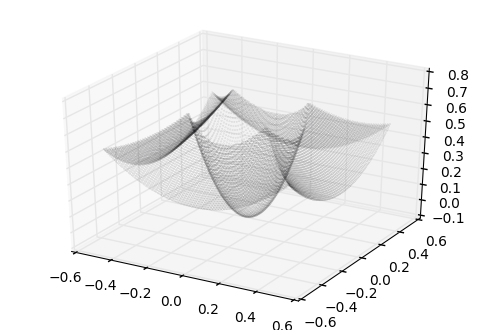

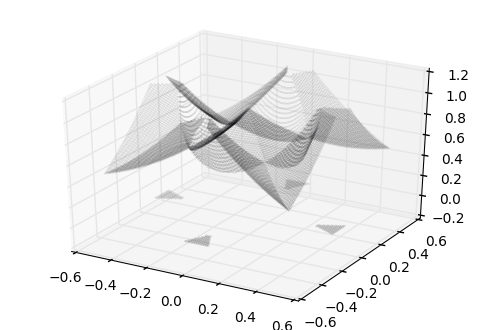

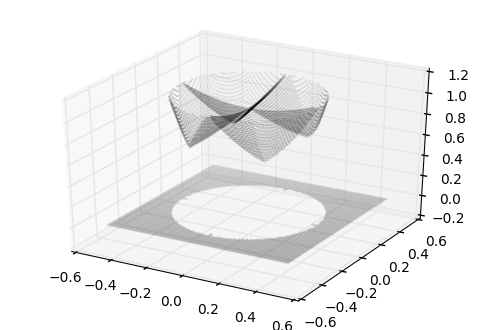

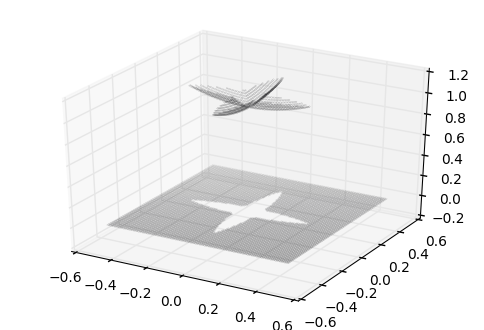

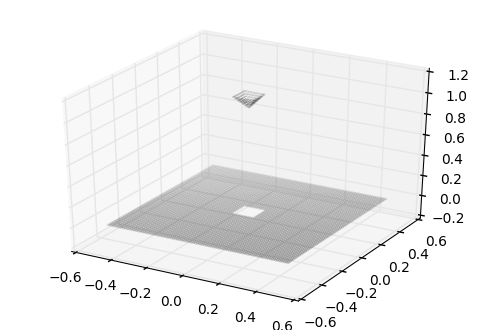

In [24]:
plot_cut_toybands(120,cutoff_answer)

### Smoothing

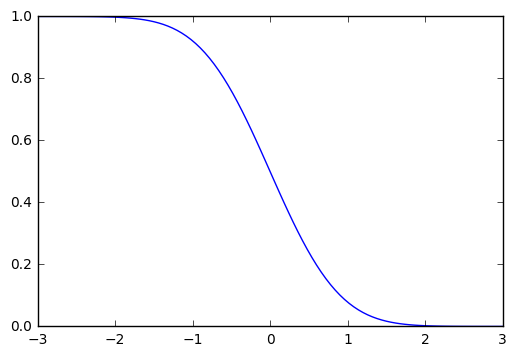

In [37]:
xs = np.linspace(-3,3,101)
ys = erfc(xs)/2.
plt.plot(xs,ys)
plt.show()

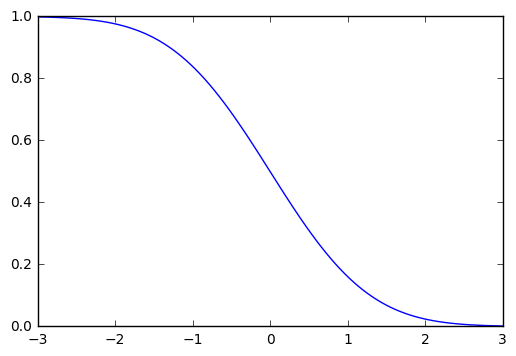

In [38]:
s = .7
xs = np.linspace(-3,3,101)
ys = erfc(s*xs)/2
plt.plot(xs,ys)
plt.show()

I probably want the smoothing function to span a set energy range.

This energy range should depend on the grid density.

For now I will leave it fixed.

In [48]:
def smooth(offset, x, s):
    """A smoothed step function.
    
    Args:
        offset (float): the symmetry point of the smoothed step function
            or where it is equal to 1/2.
        x (float): the location where the step function is being evaluated.
        s (float): the smoothing parameter
    
    Return:
        The value of the smoothed step function or modified complementary 
            error function.
    """
    return erfc(s*(x-offset))/2.

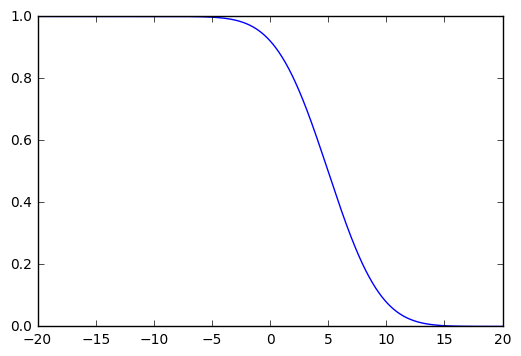

In [63]:
offset = 5.
xs = np.linspace(-20,20,1001)
ys = smooth(offset,xs,.2)
plt.plot(xs,ys)
plt.show()

In [161]:
def srectangular_method(PP,n,cutoff,s):
    """Integrate the eigenspectrum beneath the cutoff.
    
    Args:
        PP (function): a function that returns an eigenspectrum.
        n (int): the number of points along the x- and y-directions.
        cutoff (float): the cutoff value.
        
    Return:
        (float): the volume of the eigenspectrum beneath the cutoff.
    """
    integral = 0
    grid = make_grid(n)
    for kpt in grid:
        integral += sum(filter(lambda x: x <= cutoff, PP(kpt)*smooth(cutoff,PP(kpt),s)))
    return integral/len(grid)

In [188]:
smoothing_list = [2**i for i in range(0,7)] + [0]

In [189]:
smoothing_list

[1, 2, 4, 8, 16, 32, 64, 0]

In [194]:
ns

[2, 4, 8, 16, 32, 64, 128, 256]

/Users/jeremy/Envs/BZI/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


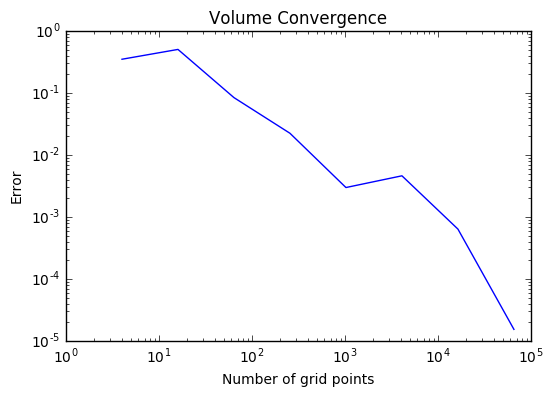

In [198]:
plt.close()
C = 2.5
toy_volumes = []
toy_cutoffs = []
ns = [2**i for i in range(1,9)]
for i,n in enumerate(ns):
    s = smoothing_list[i]
    cutoff = toycutoff(n,C)
    toy_cutoffs.append(cutoff)
    if s == 0:
        toy_volumes.append(rectangular_method(toyPP,n,cutoff))
    else:
        toy_volumes.append(srectangular_method(toyPP,n,cutoff,s))

volume_errors = [abs(tv - volume_answer) for tv in toy_volumes]
total_pts = [n**2 for n in ns]
# if s == 0.1:
    # cutoff_errors = [abs(tc - cutoff_answer) for tc in toy_cutoffs]
    # plt.loglog(total_pts, cutoff_errors, label="cutoff")

plt.loglog(total_pts, volume_errors) # , label="%s"%s)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1., .5), fancybox=True)
plt.title("Volume Convergence") 
plt.xlabel("Number of grid points")
plt.ylabel("Error")
plt.show()

In [183]:
plt.savefig("convergence.pdf")

### Adaptive Refinement